# About Data

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes. Link:https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

# Import Data

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

# Data Exploration

In [53]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Duplicated Data

In [55]:
data.duplicated().sum()

3854

In [56]:
duplicates = data.duplicated()
print(data[duplicates])

       gender   age  hypertension  heart_disease smoking_history    bmi   
2756     Male  80.0             0              0         No Info  27.32  \
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6                  159        

In [57]:
data = data.drop_duplicates()
data.duplicated().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


# Manual Feature Selection

1- Null Features

In [58]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Encoding

In [59]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [60]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [61]:
data['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [62]:
data['smoking_history'].replace('not current','former', inplace=True)
data['smoking_history'].replace('ever','never', inplace=True)
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former'], dtype=object)

In [63]:
#Ordinary Encoding
oe = OrdinalEncoder(categories=[['never', 'No Info','former','current']])
smoking_history_encoded = oe.fit_transform(data[['smoking_history']])
data.insert(1,'smoking_history_encoded', smoking_history_encoded, True) 
data.drop('smoking_history',axis=1 , inplace=True)
data.head()

,gender,smoking_history_encoded,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,0.0,80.0,0,1,25.19,6.6,140,0
1,Female,1.0,54.0,0,0,27.32,6.6,80,0
2,Male,0.0,28.0,0,0,27.32,5.7,158,0
3,Female,3.0,36.0,0,0,23.45,5.0,155,0
4,Male,3.0,76.0,1,1,20.14,4.8,155,0


In [64]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [65]:
data['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [66]:
#One-Hot Encoding
seg_ohe = OneHotEncoder()
seg_ohe_transf=seg_ohe.fit_transform(data[['gender']])
gender_encoded= pd.DataFrame(seg_ohe_transf.toarray(), columns=seg_ohe.get_feature_names_out(['gender']))
gender_1=gender_encoded.iloc[:,0]
gender_1_name=gender_encoded.columns[0]
gender_2=gender_encoded.iloc[:,1]
gender_2_name=gender_encoded.columns[1]
gender_3=gender_encoded.iloc[:,2]
gender_3_name=gender_encoded.columns[2]
data.insert(1, gender_1_name, gender_1, True) 
data.insert(2, gender_2_name, gender_2, True) 
data.insert(3, gender_3_name, gender_3, True) 
data.drop('gender',axis=1 , inplace=True)
data.head()

,gender_Female,gender_Male,gender_Other,smoking_history_encoded,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,0.0,0.0,0.0,80.0,0,1,25.19,6.6,140,0
1,1.0,0.0,0.0,1.0,54.0,0,0,27.32,6.6,80,0
2,0.0,1.0,0.0,0.0,28.0,0,0,27.32,5.7,158,0
3,1.0,0.0,0.0,3.0,36.0,0,0,23.45,5.0,155,0
4,0.0,1.0,0.0,3.0,76.0,1,1,20.14,4.8,155,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender_Female            92561 non-null  float64
 1   gender_Male              92561 non-null  float64
 2   gender_Other             92561 non-null  float64
 3   smoking_history_encoded  96146 non-null  float64
 4   age                      96146 non-null  float64
 5   hypertension             96146 non-null  int64  
 6   heart_disease            96146 non-null  int64  
 7   bmi                      96146 non-null  float64
 8   HbA1c_level              96146 non-null  float64
 9   blood_glucose_level      96146 non-null  int64  
 10  diabetes                 96146 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 8.8 MB


# Data Visualization

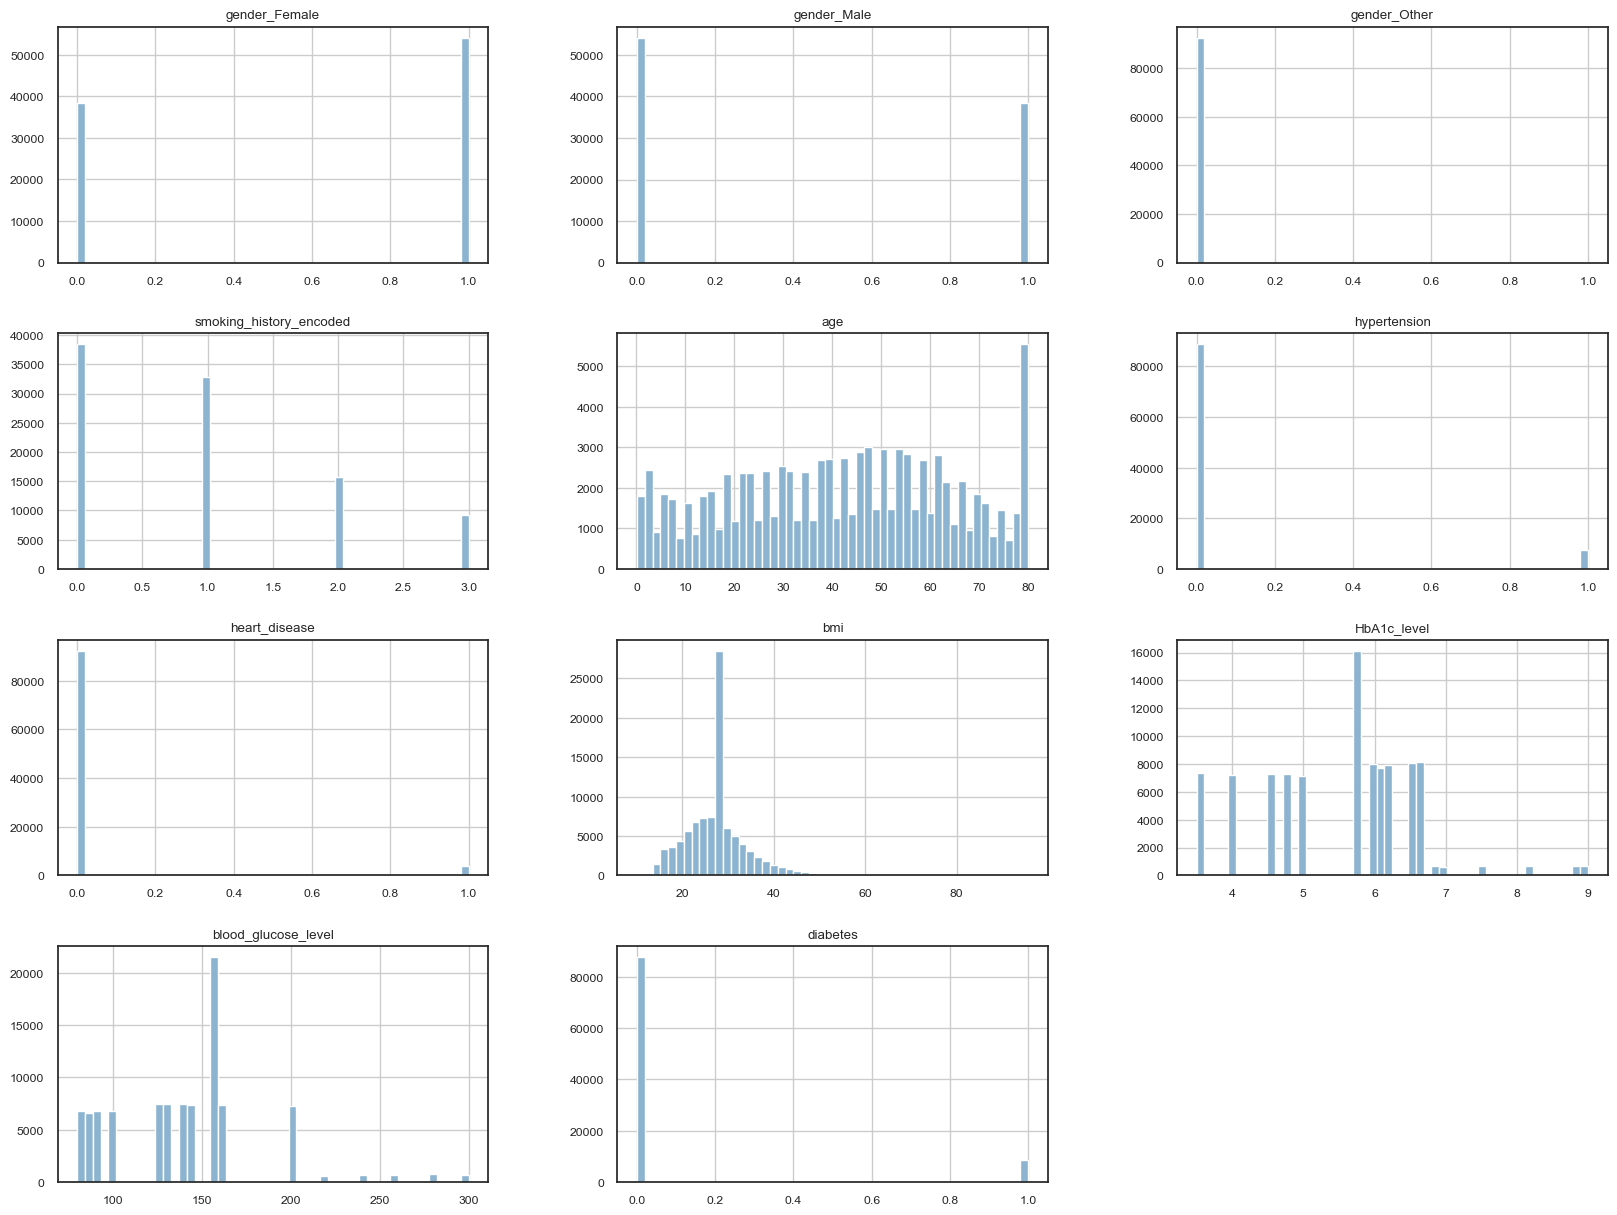

In [68]:
data.hist(bins=50, figsize=(20,15))
plt.show()

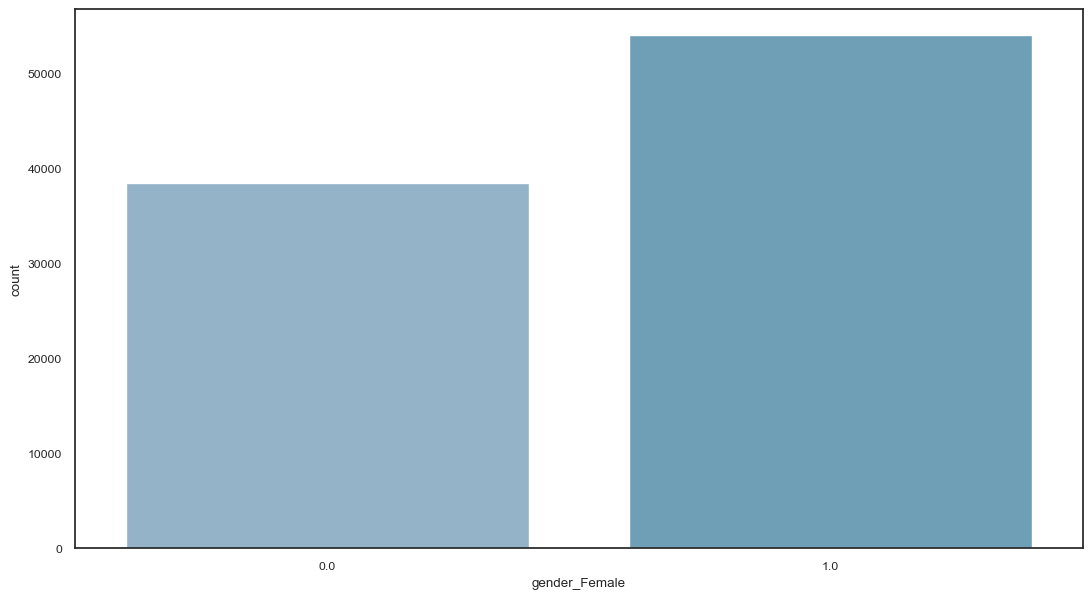

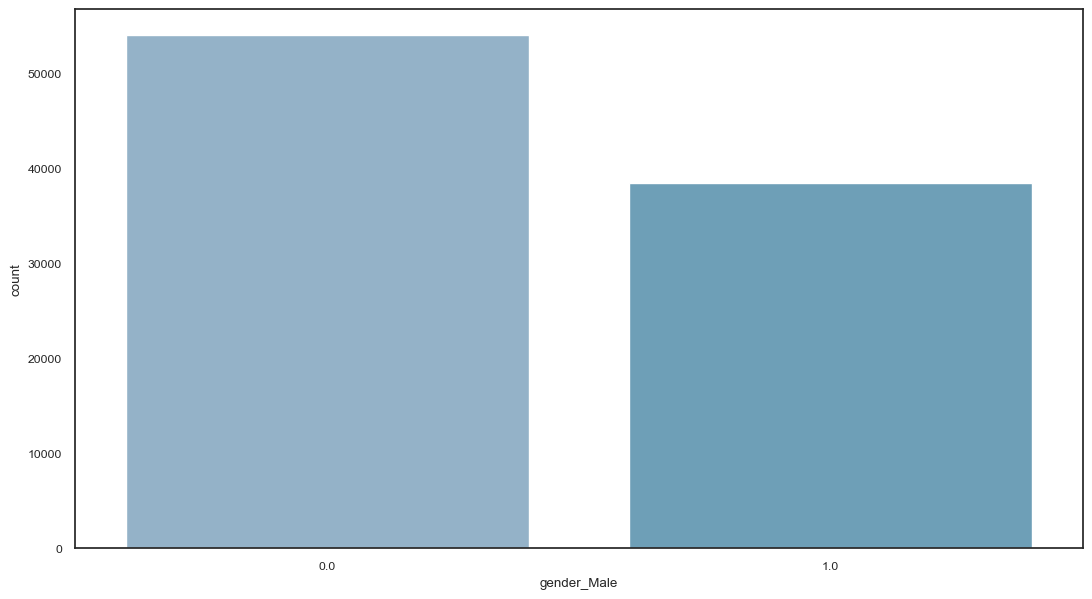

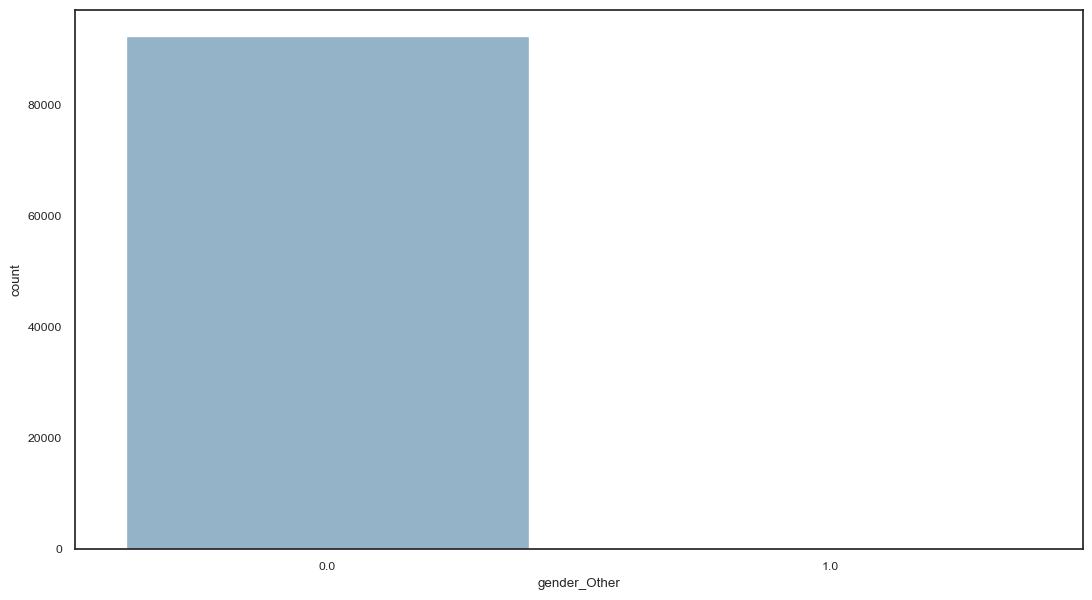

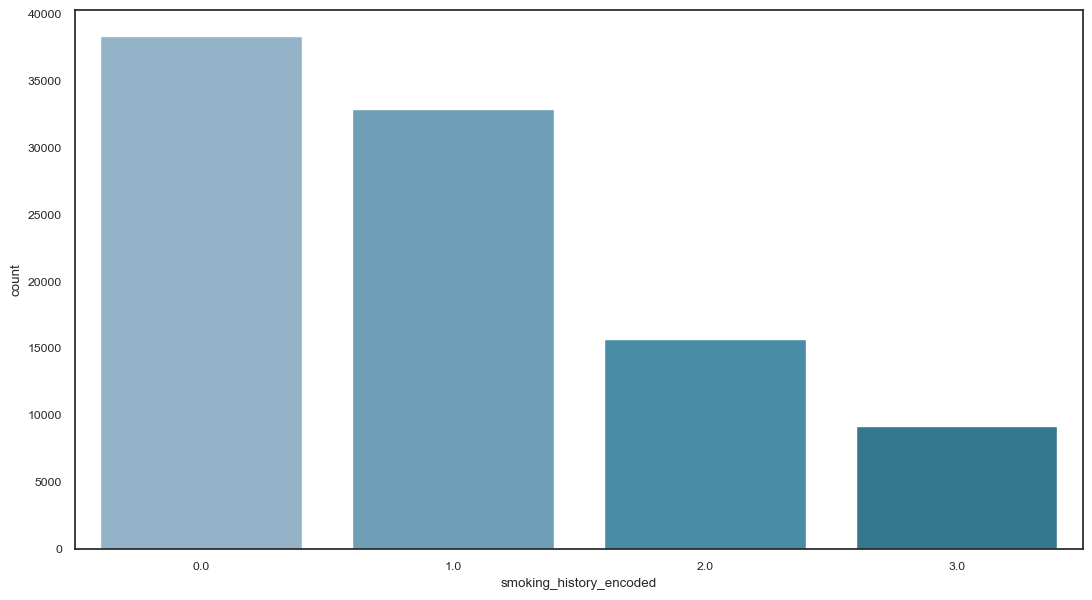

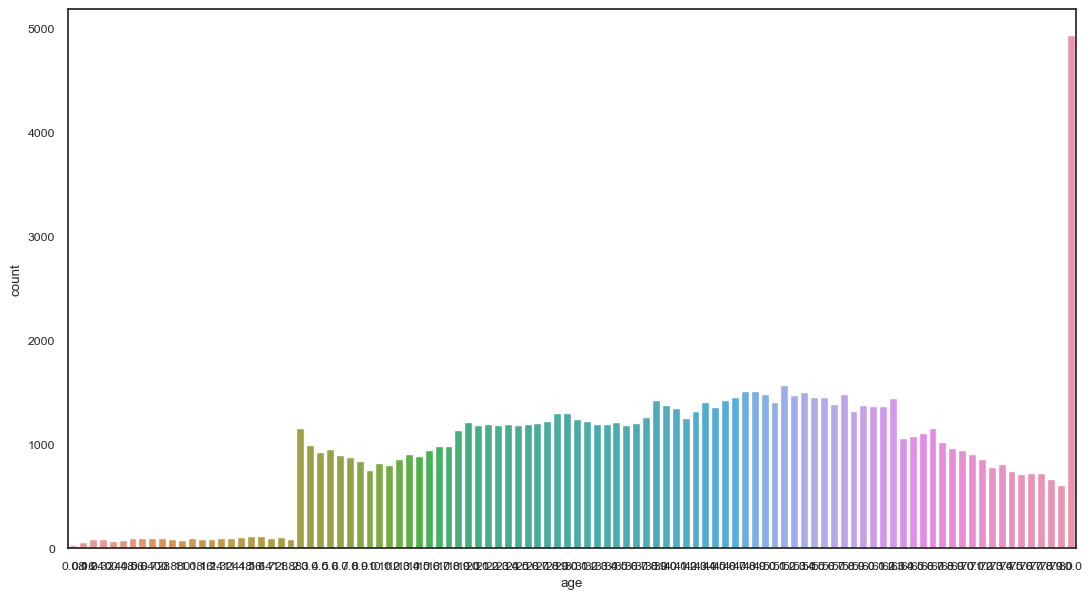

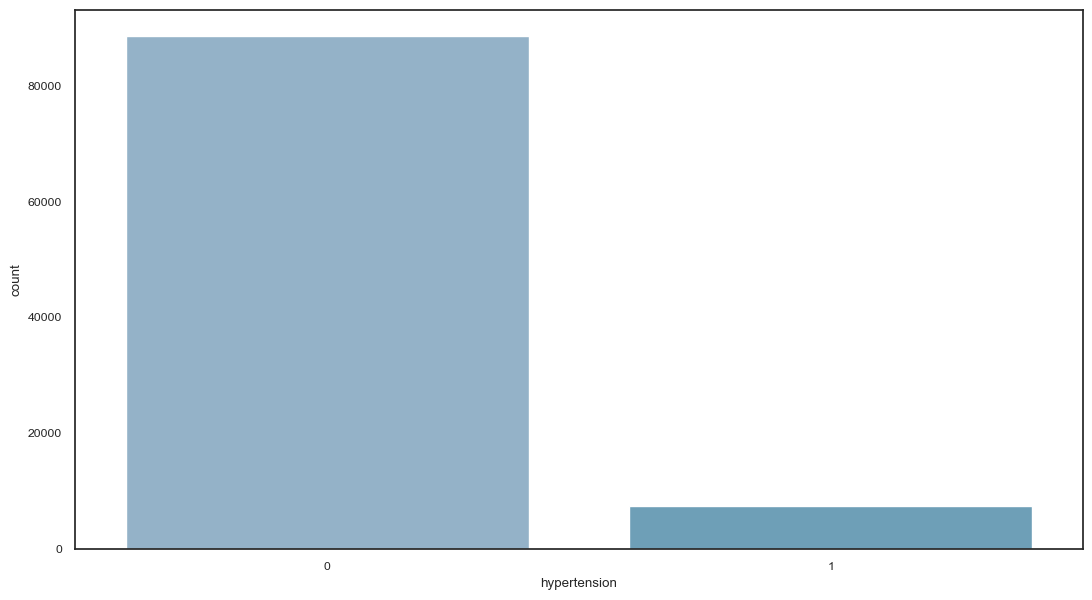

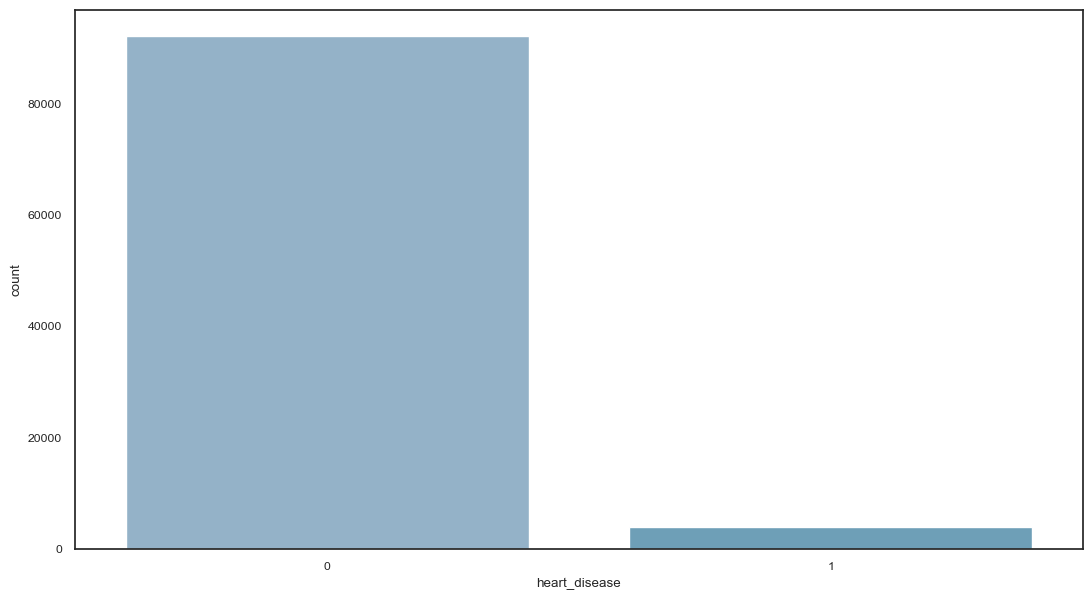

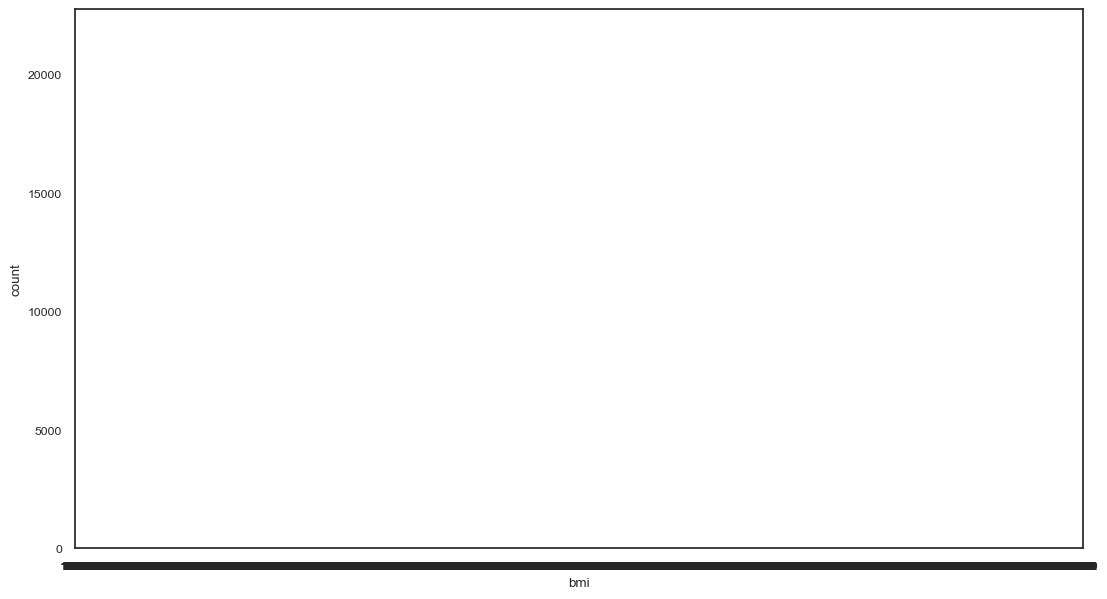

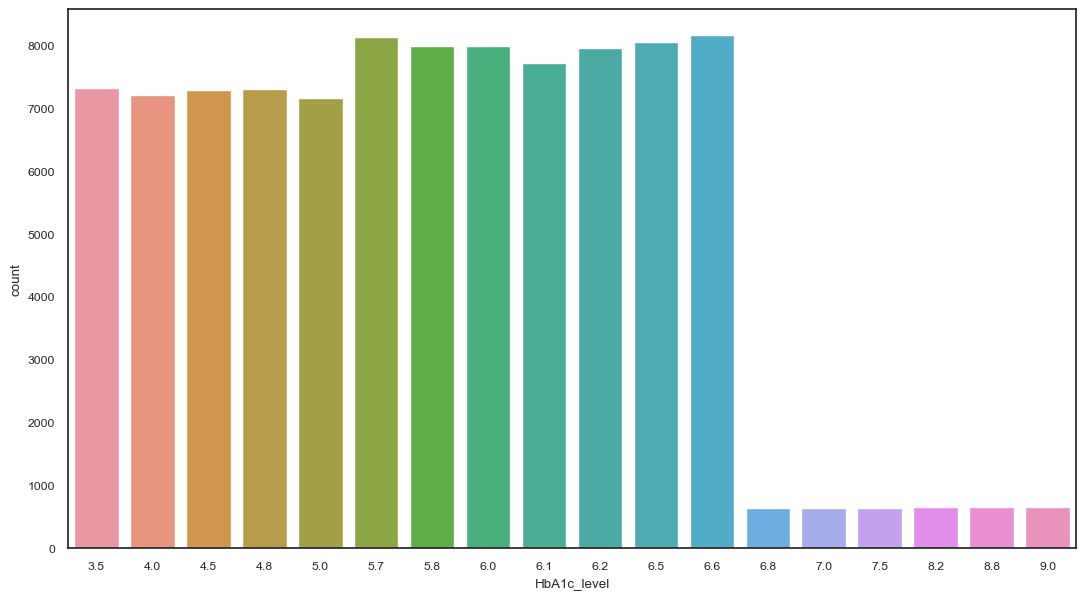

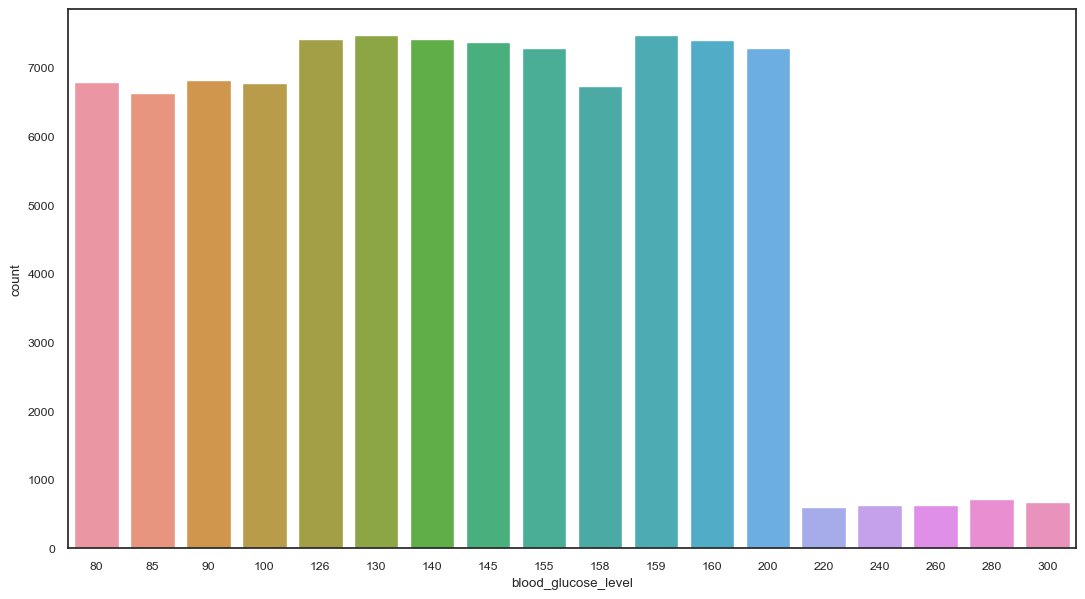

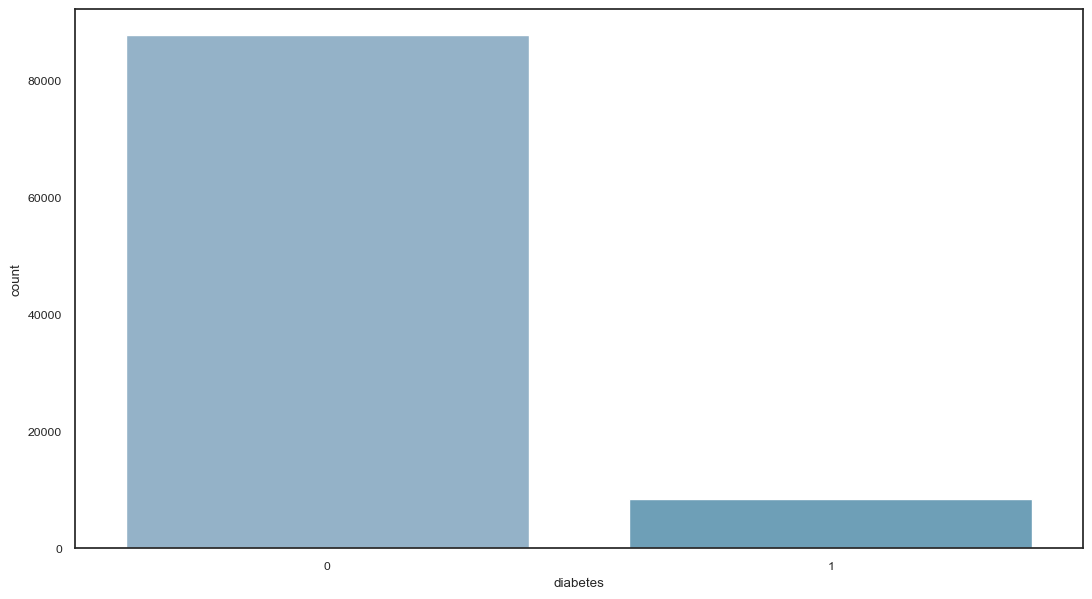

In [69]:
for i in data.columns:
    plt.figure(figsize=(13,7))
    sns.countplot(x=data[i], data=data)
    plt.show()

### Correlation Analysis

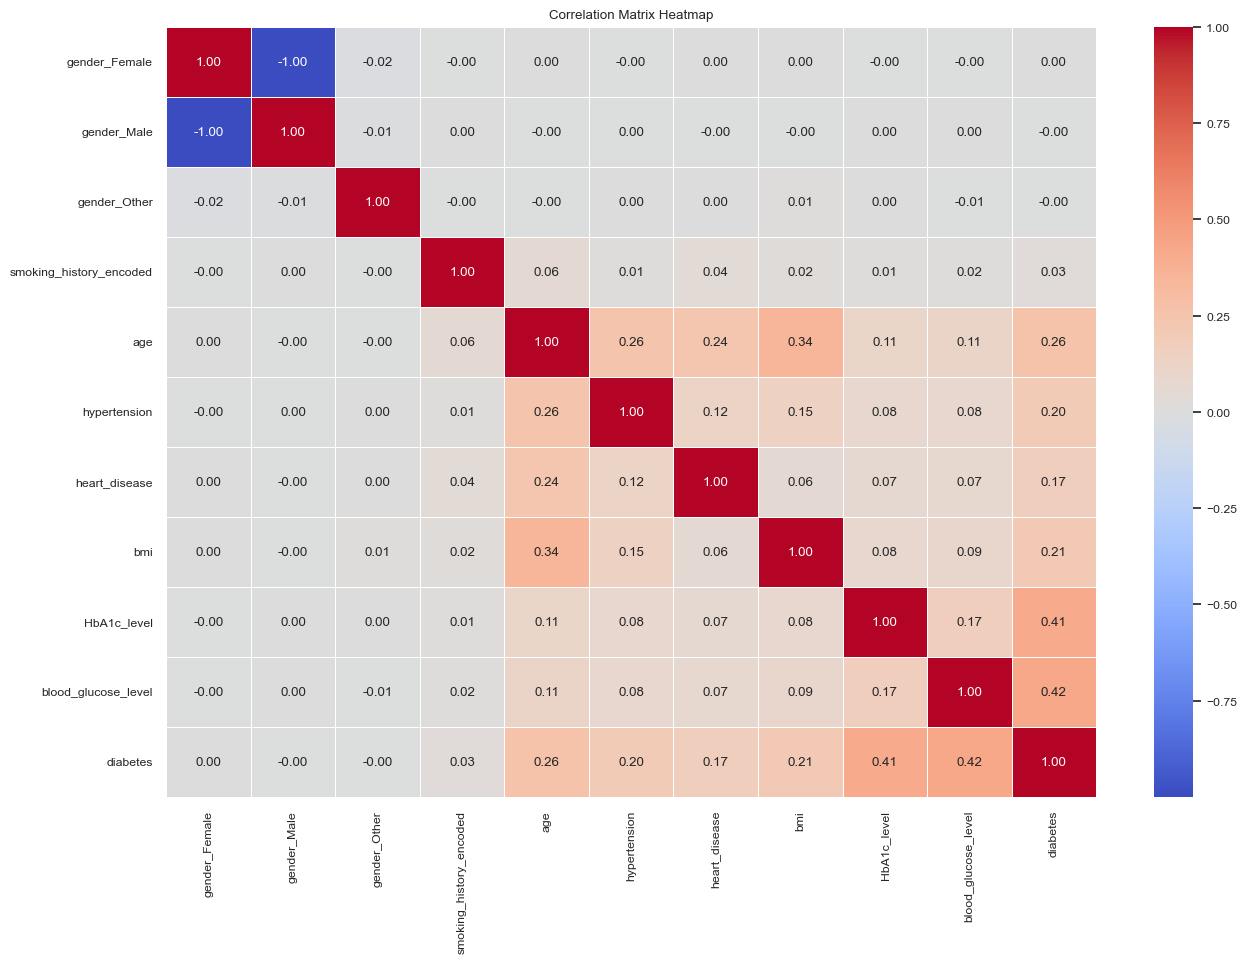

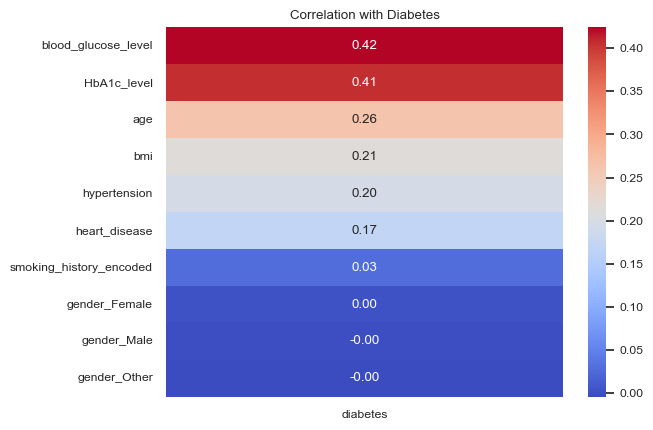

In [70]:
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()
#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')
# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [71]:
data=data.drop(['gender_Other','gender_Male','gender_Female','smoking_history_encoded'],axis=1)

In [72]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


### Unbalanced Data

In [73]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [74]:
x = data.drop('diabetes', axis=1)
y = data['diabetes']

In [75]:
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)
# apply SMOTE to the data
x_resampled, y_resampled = smote.fit_resample(x, y)
# print the new class distribution
print('Resampled class distribution:', Counter(y_resampled))

Resampled class distribution: Counter({0: 87664, 1: 87664})


In [76]:
x_resampled['diabetes']=y_resampled
data=x_resampled
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


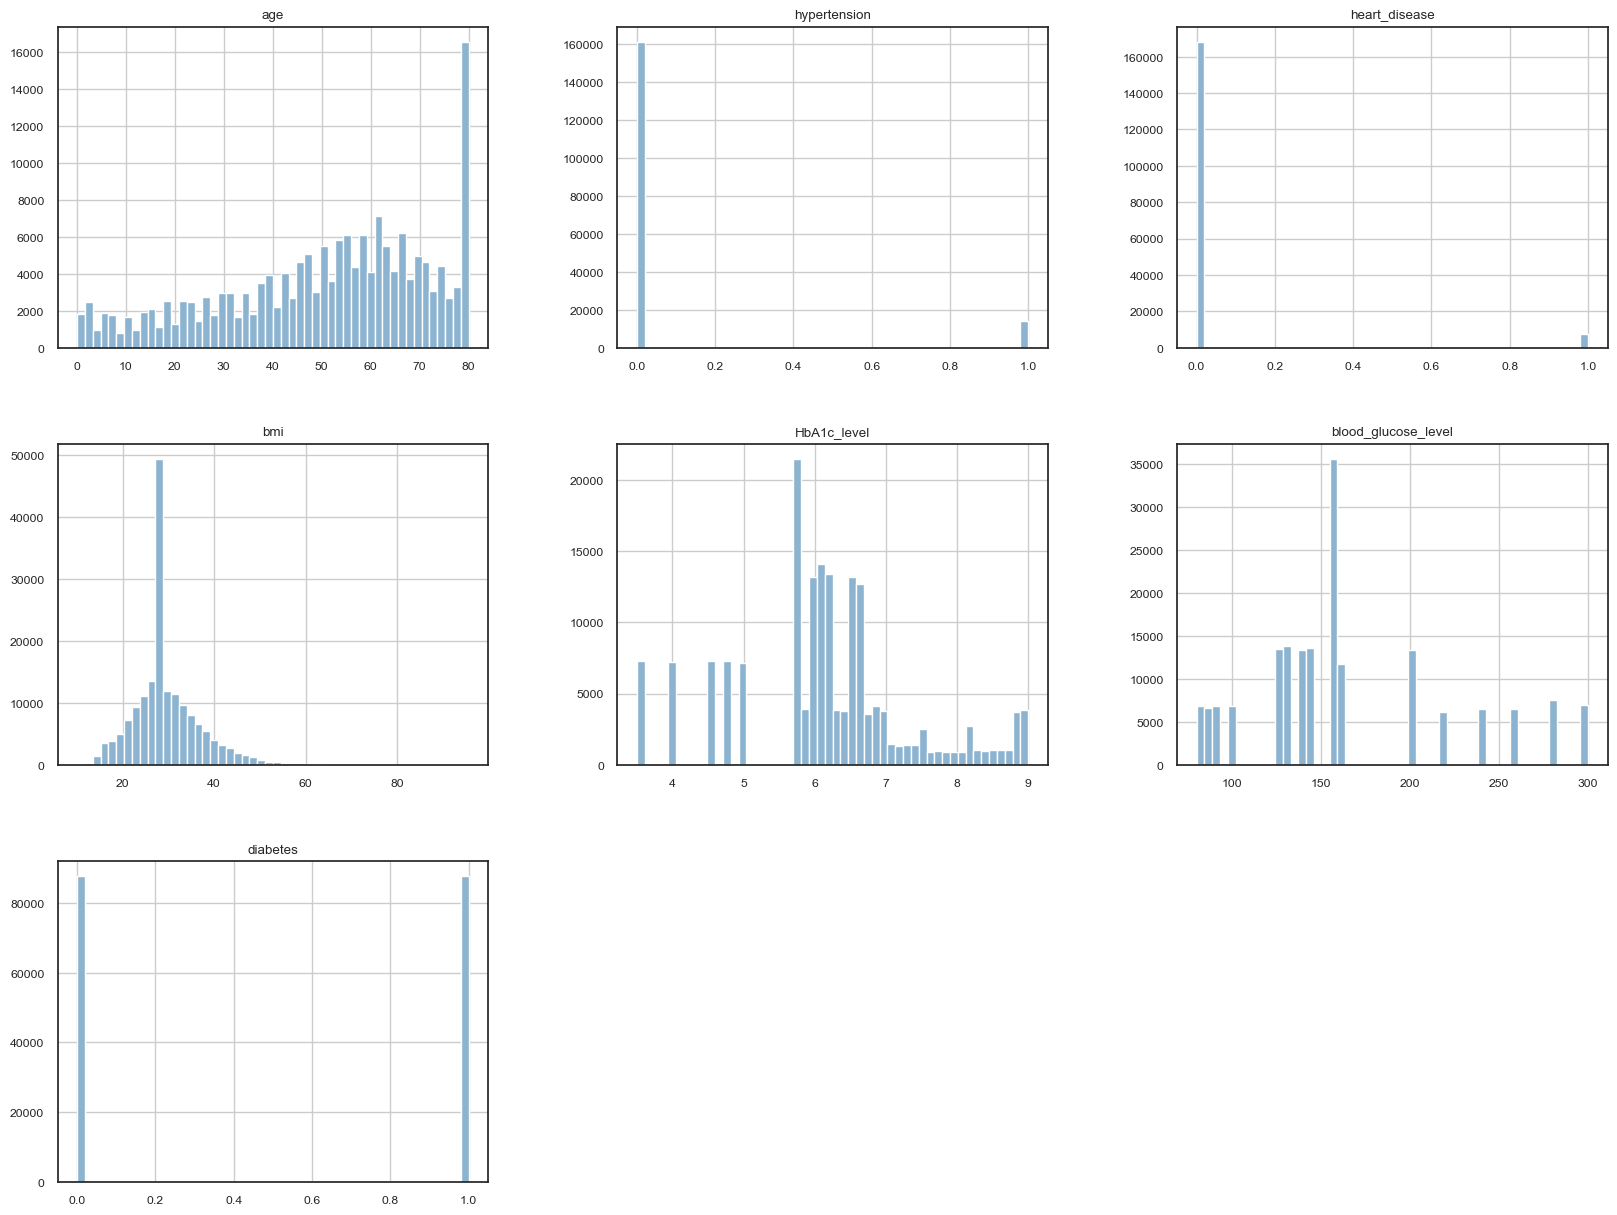

In [77]:
data.hist(bins=50, figsize=(20,15))
plt.show()

### Outlier Analysis

In [78]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,175328.0,50.463153,21.495272,0.08,36.00,54.000000,67.000000,80.00
hypertension,175328.0,0.080193,0.271592,0.00,0.00,0.000000,0.000000,1.00
heart_disease,175328.0,0.041568,0.199600,0.00,0.00,0.000000,0.000000,1.00
bmi,175328.0,29.421502,7.398557,10.01,25.73,27.320000,32.909008,95.69
HbA1c_level,175328.0,6.144468,1.226834,3.50,5.70,6.117451,6.600000,9.00
blood_glucose_level,175328.0,163.428985,56.964666,80.00,130.00,155.000000,200.000000,300.00
diabetes,175328.0,0.500000,0.500001,0.00,0.00,0.500000,1.000000,1.00


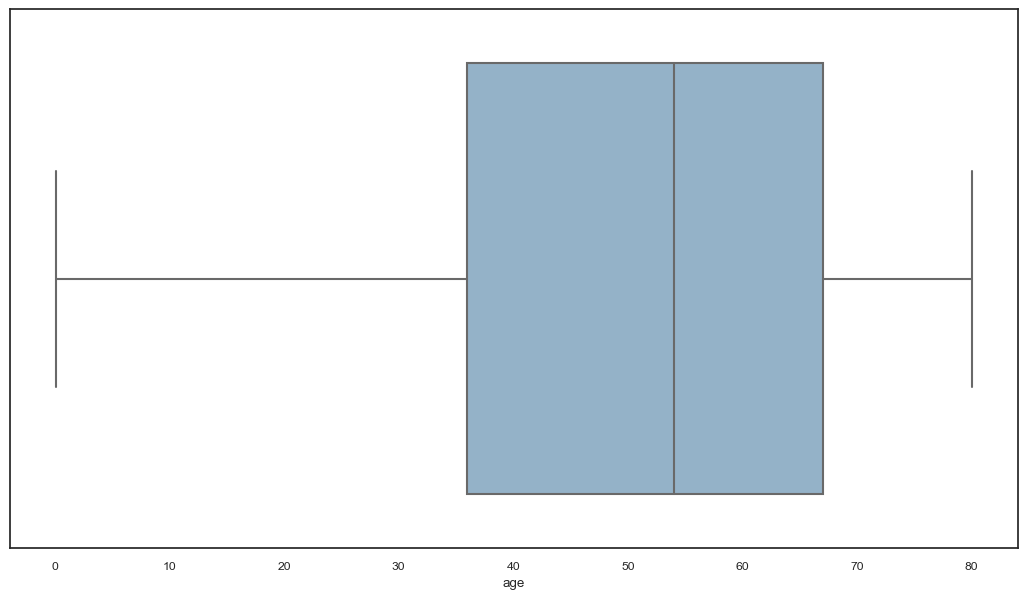

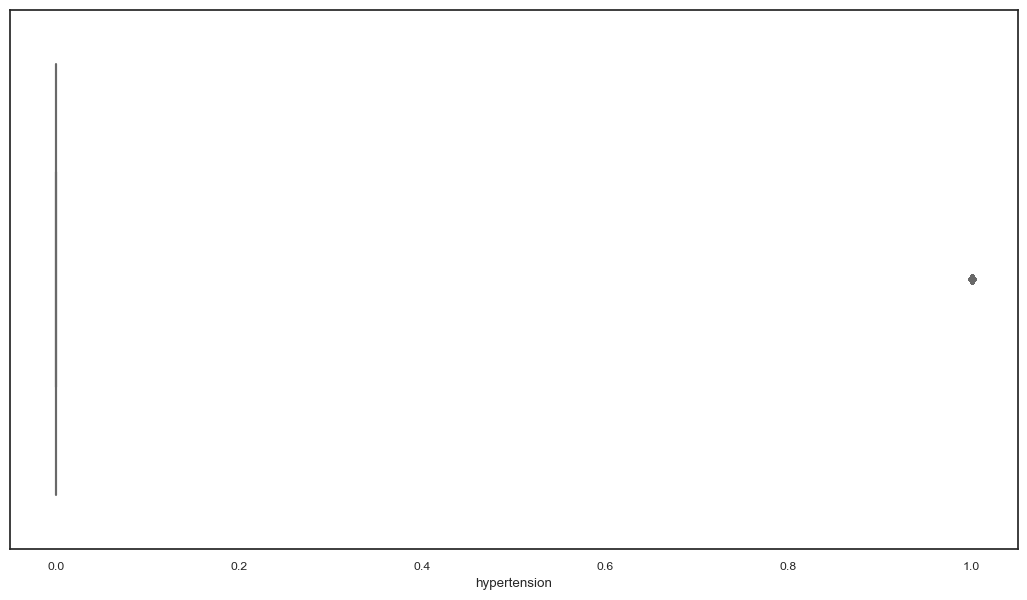

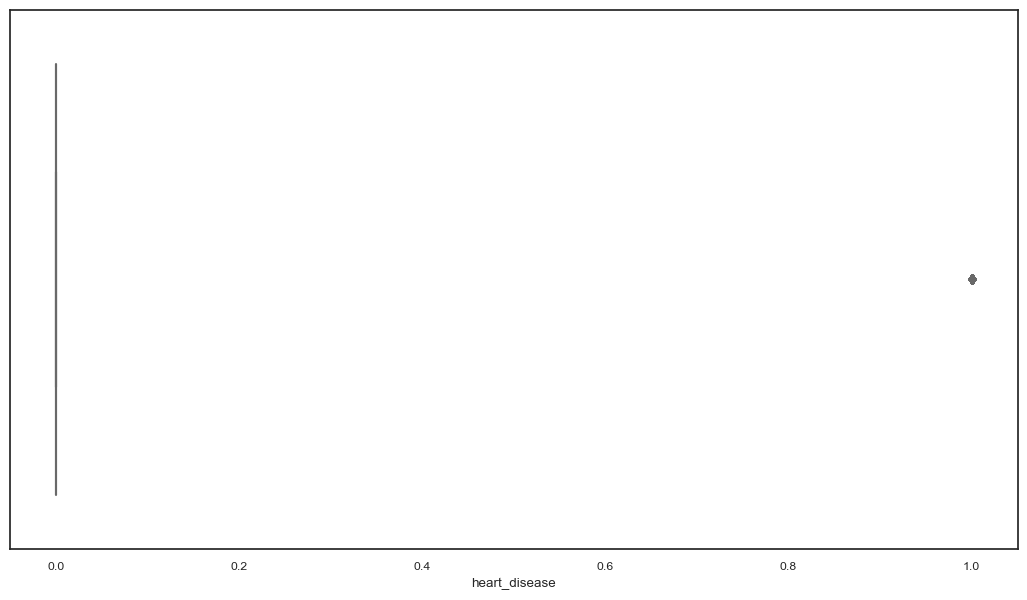

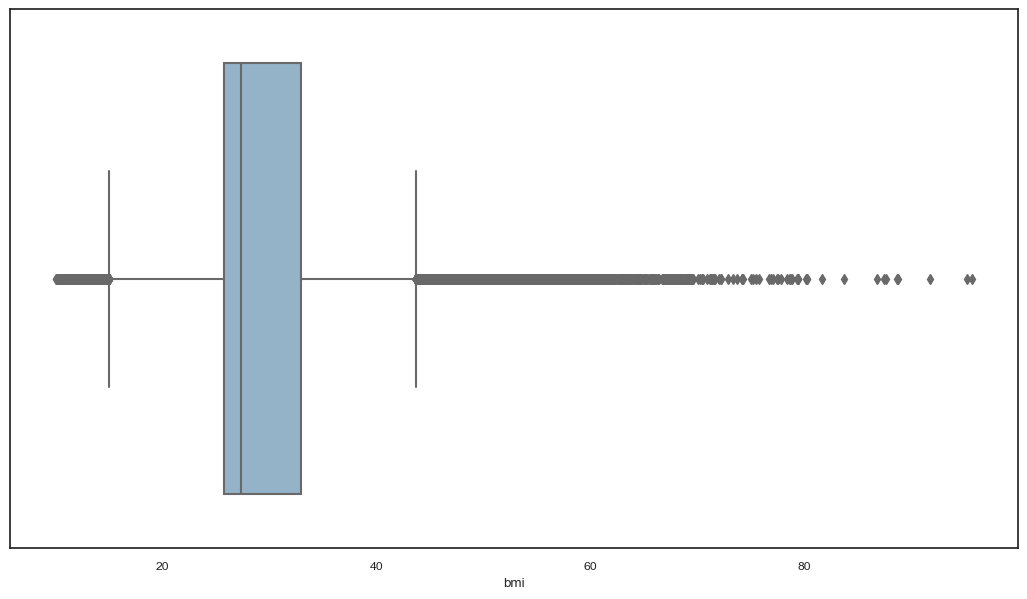

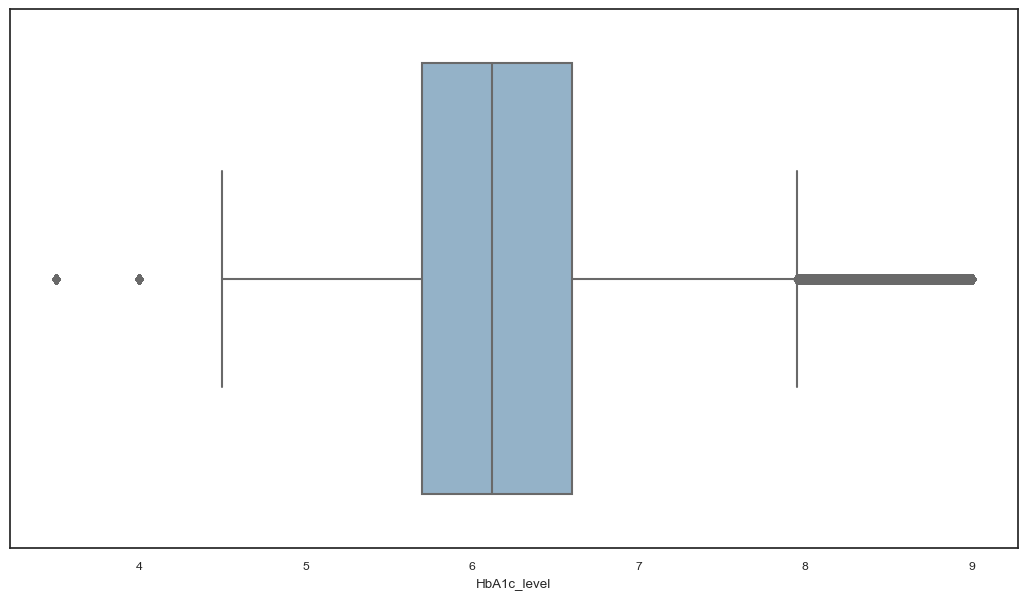

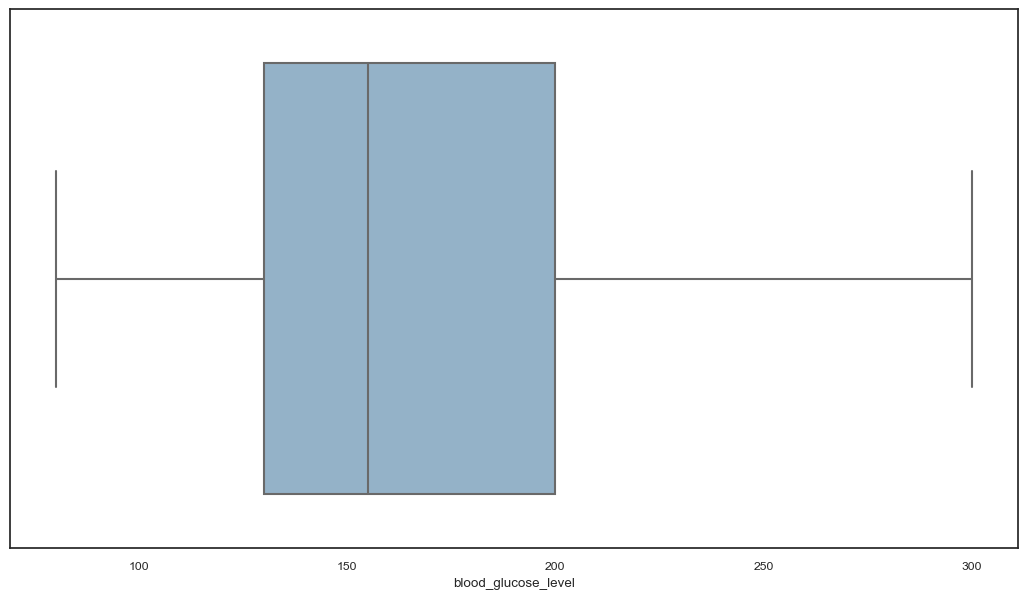

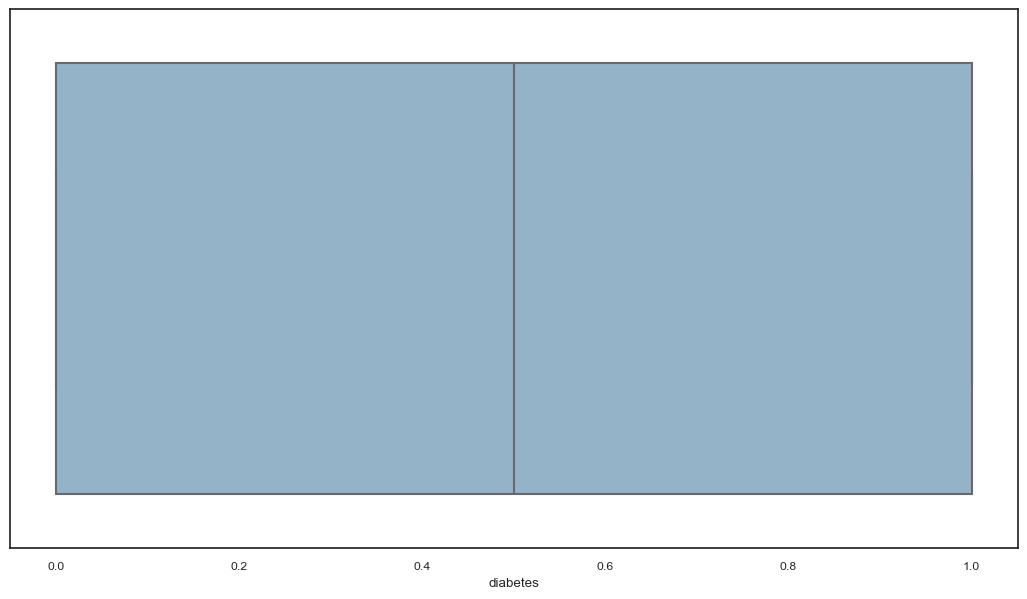

In [79]:
for i in data.columns:
    plt.figure(figsize=(13,7))
    sns.boxplot(x=data[i])
    plt.show()

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175328 entries, 0 to 175327
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  175328 non-null  float64
 1   hypertension         175328 non-null  int64  
 2   heart_disease        175328 non-null  int64  
 3   bmi                  175328 non-null  float64
 4   HbA1c_level          175328 non-null  float64
 5   blood_glucose_level  175328 non-null  int64  
 6   diabetes             175328 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 9.4 MB


In [81]:
# Calculate the upper and lower limits
Q1 = data['HbA1c_level'].quantile(0.25)
Q3 = data['HbA1c_level'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['HbA1c_level']>=upper)[0]
lower_array = np.where(data['HbA1c_level']<=lower)[0]
 
# Removing the outliers

data=data.drop(index=upper_array)
data=data.drop(index=lower_array)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143969 entries, 0 to 175327
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  143969 non-null  float64
 1   hypertension         143969 non-null  int64  
 2   heart_disease        143969 non-null  int64  
 3   bmi                  143969 non-null  float64
 4   HbA1c_level          143969 non-null  float64
 5   blood_glucose_level  143969 non-null  int64  
 6   diabetes             143969 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 8.8 MB


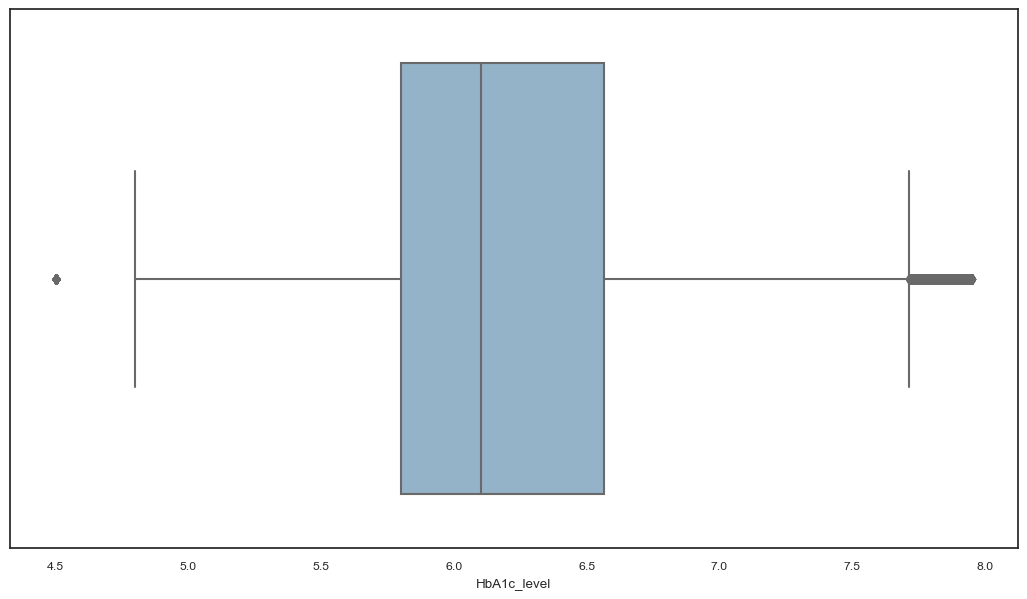

In [82]:
plt.figure(figsize=(13,7))
sns.boxplot(x=data['HbA1c_level'])
plt.show()

# Machine Learning Models (Classification Models)

Libraries

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import make_pipeline

Split Data

In [84]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Scaling

In [86]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

Grid Search

In [87]:
def grid_search_func(model, params):
  grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=5,n_jobs=-1)
  grid.fit(x_train,y_train)
  print(f'The Best Hyper_Pramaters = {grid.best_params_}')

Validation

In [88]:
def valid(model):
    model.fit(x_train, y_train)
    y_pred_train=model.predict(x_train)
    y_pred_val = model.predict(x_valid)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_valid, y_pred_val)
    print("train accuracy:", accuracy_train)
    print("Validation accuracy:", accuracy_val)

Accuracy

In [89]:
def acc(model):
    y_pred = model.predict(x_test)
    recall_sc = recall_score(y_test,y_pred)
    precision_sc = precision_score(y_test,y_pred)
    f1_sc = f1_score(y_test, y_pred)
    Asc = accuracy_score(y_test, y_pred)
    print('Recall :',recall_sc)
    print('Precision:',precision_sc)
    print('F1 Score :',f1_sc)
    print('Accuracy :',Asc)
    cm_display=confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_display, annot=True)
    return Asc

1- Logistic

In [90]:
Logistic = LogisticRegression()

In [91]:
valid(Logistic)

train accuracy: 0.8606468417625353
Validation accuracy: 0.858389407423486


Recall : 0.8537552204997523
Precision: 0.8517655367231638
F1 Score : 0.8527592180153427
Accuracy : 0.8553518094047371


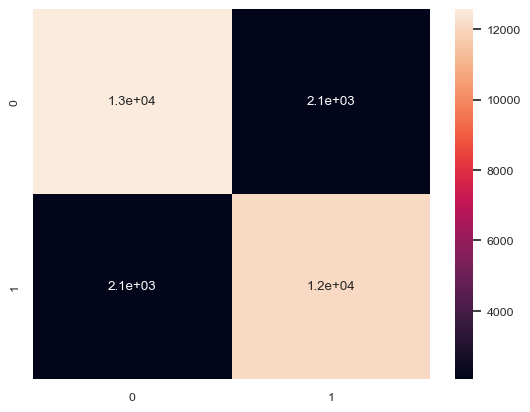

In [92]:
Logistic_Accuracy=acc(Logistic)

2- KNN

In [93]:
knn=KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,7,9,11,13,15,17,19]}
grid_search_func(knn, param_grid)

The Best Hyper_Pramaters = {'n_neighbors': 3}


In [94]:
knn=KNeighborsClassifier(n_neighbors=3)

In [95]:
valid(knn)

train accuracy: 0.9593878879965271
Validation accuracy: 0.9209463859344476


Recall : 0.931974233736816
Precision: 0.9074993107251171
F1 Score : 0.9195739479657761
Accuracy : 0.9200180593179135


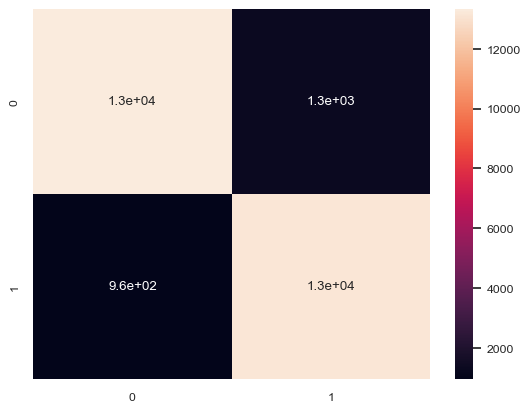

In [96]:
KNN_Accuracy=acc(knn)

3- SVM

In [97]:
svm_model=SVC()

In [98]:
valid(svm_model)

train accuracy: 0.8829390058606469
Validation accuracy: 0.882526589971782


Recall : 0.9118708855383308
Precision: 0.8552649050590891
F1 Score : 0.8826612765082736
Accuracy : 0.8810516079738835


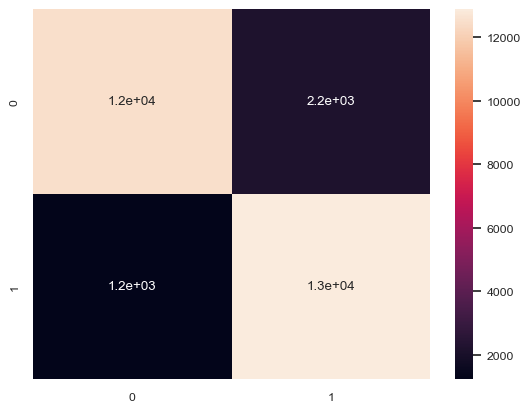

In [99]:
SVM_Accuracy=acc(svm_model)

4- Decision Tree

In [100]:
DTC= DecisionTreeClassifier()
param_grid = {
  'max_depth': [3,4,5,6,7,8,9,10],
}
grid_search_func(DTC, param_grid)

The Best Hyper_Pramaters = {'max_depth': 10}


In [105]:
DTR=DecisionTreeClassifier(max_depth= 10)

In [106]:
valid(DTC)

train accuracy: 0.9979813327545041
Validation accuracy: 0.9631430431951379


Recall : 0.9654562185885185
Precision: 0.9617120293329573
F1 Score : 0.9635804867709916
Accuracy : 0.9641939292908245


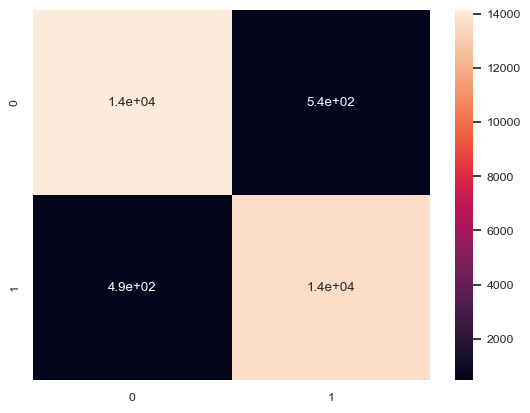

In [107]:
DTC_Accuracy=acc(DTC)

5- Bagging

In [110]:
bag=BaggingClassifier(
    base_estimator=LogisticRegression(),
    n_estimators=1000,
    max_samples=500,
    bootstrap=True,
    n_jobs=-1
)

In [111]:
valid(bag)

C:\Users\Mohamed Ali\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


train accuracy: 0.8609941393531583
Validation accuracy: 0.8591708270023877


Recall : 0.8543922984356197
Precision: 0.8517995765702188
F1 Score : 0.8530939675583984
Accuracy : 0.8556296450649441


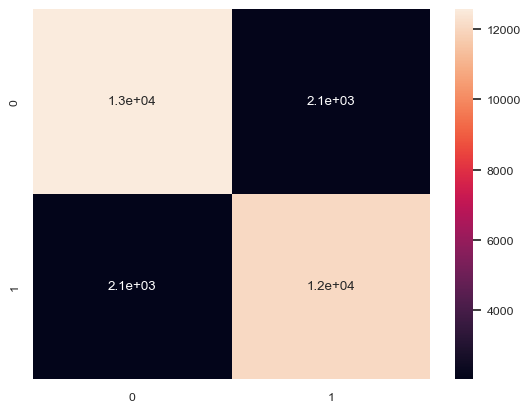

In [112]:
Bagging_Accuracy=acc(bag)

6- Random Forest

In [113]:
RandomForest=RandomForestClassifier(n_estimators=100,random_state=42)

In [114]:
valid(RandomForest)

train accuracy: 0.9979813327545041
Validation accuracy: 0.9668764922943347


Recall : 0.9646775677780137
Precision: 0.9692745376955904
F1 Score : 0.9669705892787455
Accuracy : 0.9676668750434119


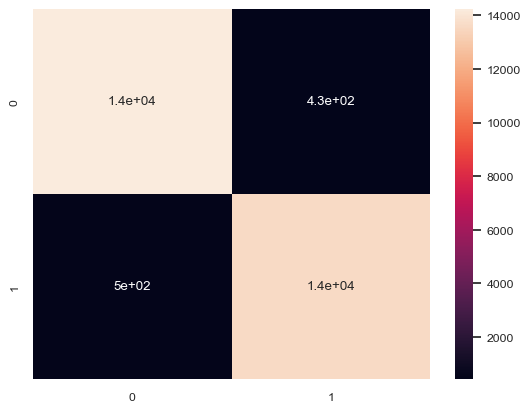

In [132]:
RandomForest_Accuracy=acc(RandomForest)

7- Ada Boost

In [116]:
AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
    n_estimators=200,
    learning_rate=.5,
    random_state=42)

In [117]:
valid(AdaBoost)

C:\Users\Mohamed Ali\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


train accuracy: 0.9979813327545041
Validation accuracy: 0.9606685478619492


Recall : 0.9588730799178877
Precision: 0.9597562703698456
F1 Score : 0.9593144718671436
Accuracy : 0.9600958533027714


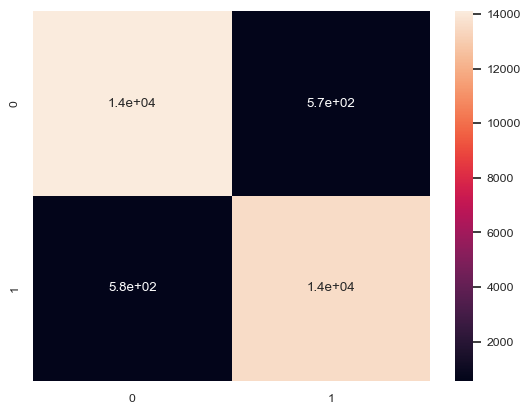

In [118]:
AdaBoost_Accuracy=acc(AdaBoost)

8- Gradient Boosting

In [119]:
GradientBoost=GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=.5,
    random_state=40
)

In [120]:
valid(GradientBoost)

train accuracy: 0.9746255697851096
Validation accuracy: 0.9707401779900152


Recall : 0.9484674736320521
Precision: 0.9910502958579882
F1 Score : 0.9692914240243065
Accuracy : 0.9705146905605334


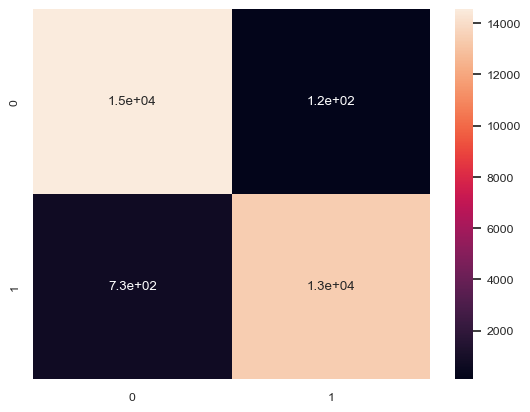

In [121]:
GradientBoost_Accuracy=acc(GradientBoost)

9- XGB Boost

In [122]:
xgb=xgb.XGBClassifier(objective='binary:logistic',random_state=42)

In [123]:
valid(xgb)

train accuracy: 0.9754178424137182
Validation accuracy: 0.9701758194052529


Recall : 0.9488214058186452
Precision: 0.9903945618442441
F1 Score : 0.9691623585553667
Accuracy : 0.97037577273043


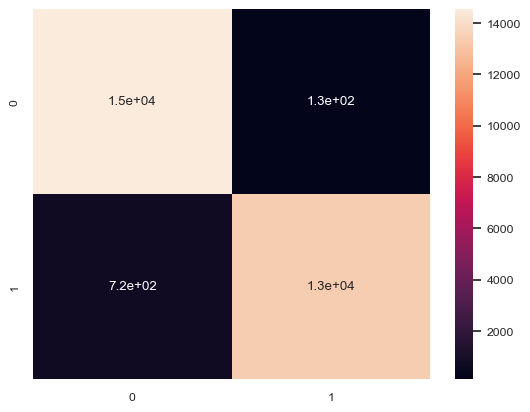

In [124]:
xgb_Accuracy=acc(xgb)

10- Stacking

In [125]:
estimator=[
    ('dt', DecisionTreeClassifier()),
    ('svc', LinearSVC())
]
Stacking=StackingClassifier(estimators=estimator,final_estimator=LogisticRegression())

In [126]:
valid(Stacking)

C:\Users\Mohamed Ali\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mohamed Ali\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mohamed Ali\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mohamed Ali\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mohamed Ali\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


train accuracy: 0.9974712394182765
Validation accuracy: 0.9631864553939657


C:\Users\Mohamed Ali\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Recall : 0.9655270050258371
Precision: 0.9598874032371569
F1 Score : 0.9626989448424321
Accuracy : 0.9632909633951517


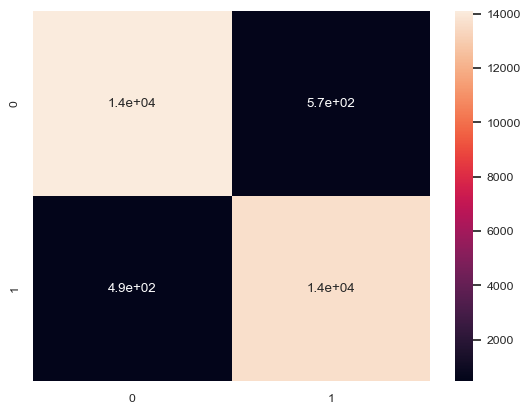

In [127]:
Stacking_Accuracy=acc(Stacking)

11- Naive Bayes

In [128]:
Naive = GaussianNB()

In [129]:
valid(Naive)

train accuracy: 0.8198936401128717
Validation accuracy: 0.8224006945951813


Recall : 0.7773058681956537
Precision: 0.8370302614528546
F1 Score : 0.8060632753431696
Accuracy : 0.8164895464332848


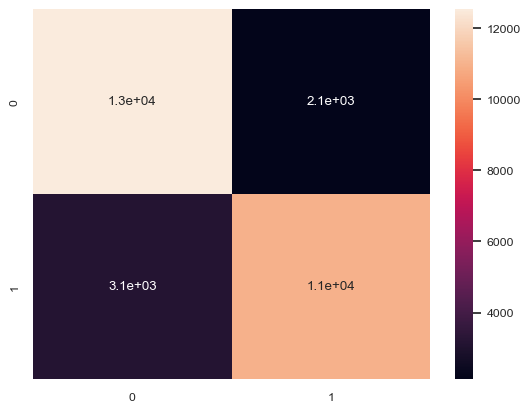

In [130]:
Naive_Accuracy=acc(Naive)

# Comparison

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Logistic'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'D Tree'),
  Text(4, 0, 'Bagging'),
  Text(5, 0, 'Random Forest'),
  Text(6, 0, 'Ada Boost'),
  Text(7, 0, 'Gradient Boosting'),
  Text(8, 0, 'XGB Boost'),
  Text(9, 0, 'Stacking'),
  Text(10, 0, 'Naive Bayes')])

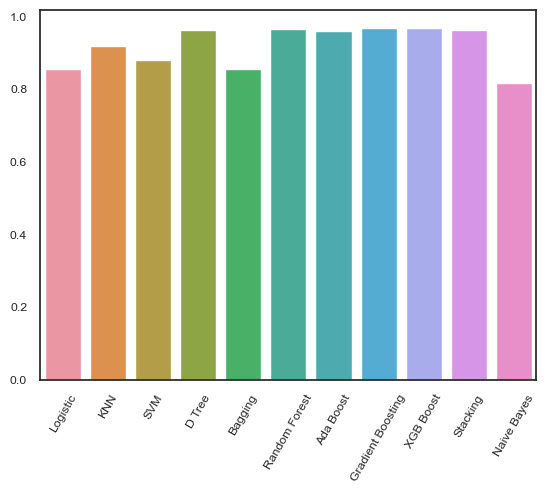

In [133]:
models_names=['Logistic','KNN','SVM','D Tree','Bagging', 'Random Forest' ,'Ada Boost', 'Gradient Boosting', 'XGB Boost', 'Stacking', 'Naive Bayes']
models_scores=[Logistic_Accuracy,KNN_Accuracy,SVM_Accuracy,DTC_Accuracy,Bagging_Accuracy,RandomForest_Accuracy,AdaBoost_Accuracy,GradientBoost_Accuracy,xgb_Accuracy,Stacking_Accuracy,Naive_Accuracy]
sns.barplot(x=models_names, y=models_scores, data=data)
plt.xticks(rotation=60)